# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [41]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [43]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [44]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [45]:
cancer_df.shape

(699, 11)

In [46]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [47]:
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [48]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [49]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].replace('?','1')
cancer_df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [50]:
cancer_df.shape

(699, 11)

In [51]:
cancer_df.drop_duplicates(subset ='ID', inplace = True) 

In [52]:
cancer_df.shape

(645, 11)

In [54]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [34]:
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
# Choosing mode for replacing value

In [66]:
cancer_source = cancer_df.iloc[:,:-1]
cancer_target = cancer_df.iloc[:,-1]
print(cancer_source.head())
print(cancer_target.head())

        ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2            1                3                1   
1                            7           10                3                2   
2                            2            2                3                1   
3                            3            4                3                7   
4                            2            1                3                1   

   Mitoses  
0        1  
1        1  
2        1  
3        1  
4        1  
0 

In [67]:
cancer_source = cancer_source.drop(['ID'],axis=1)
cancer_source

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
10,1,1,1,1,1,1,3,1,1


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


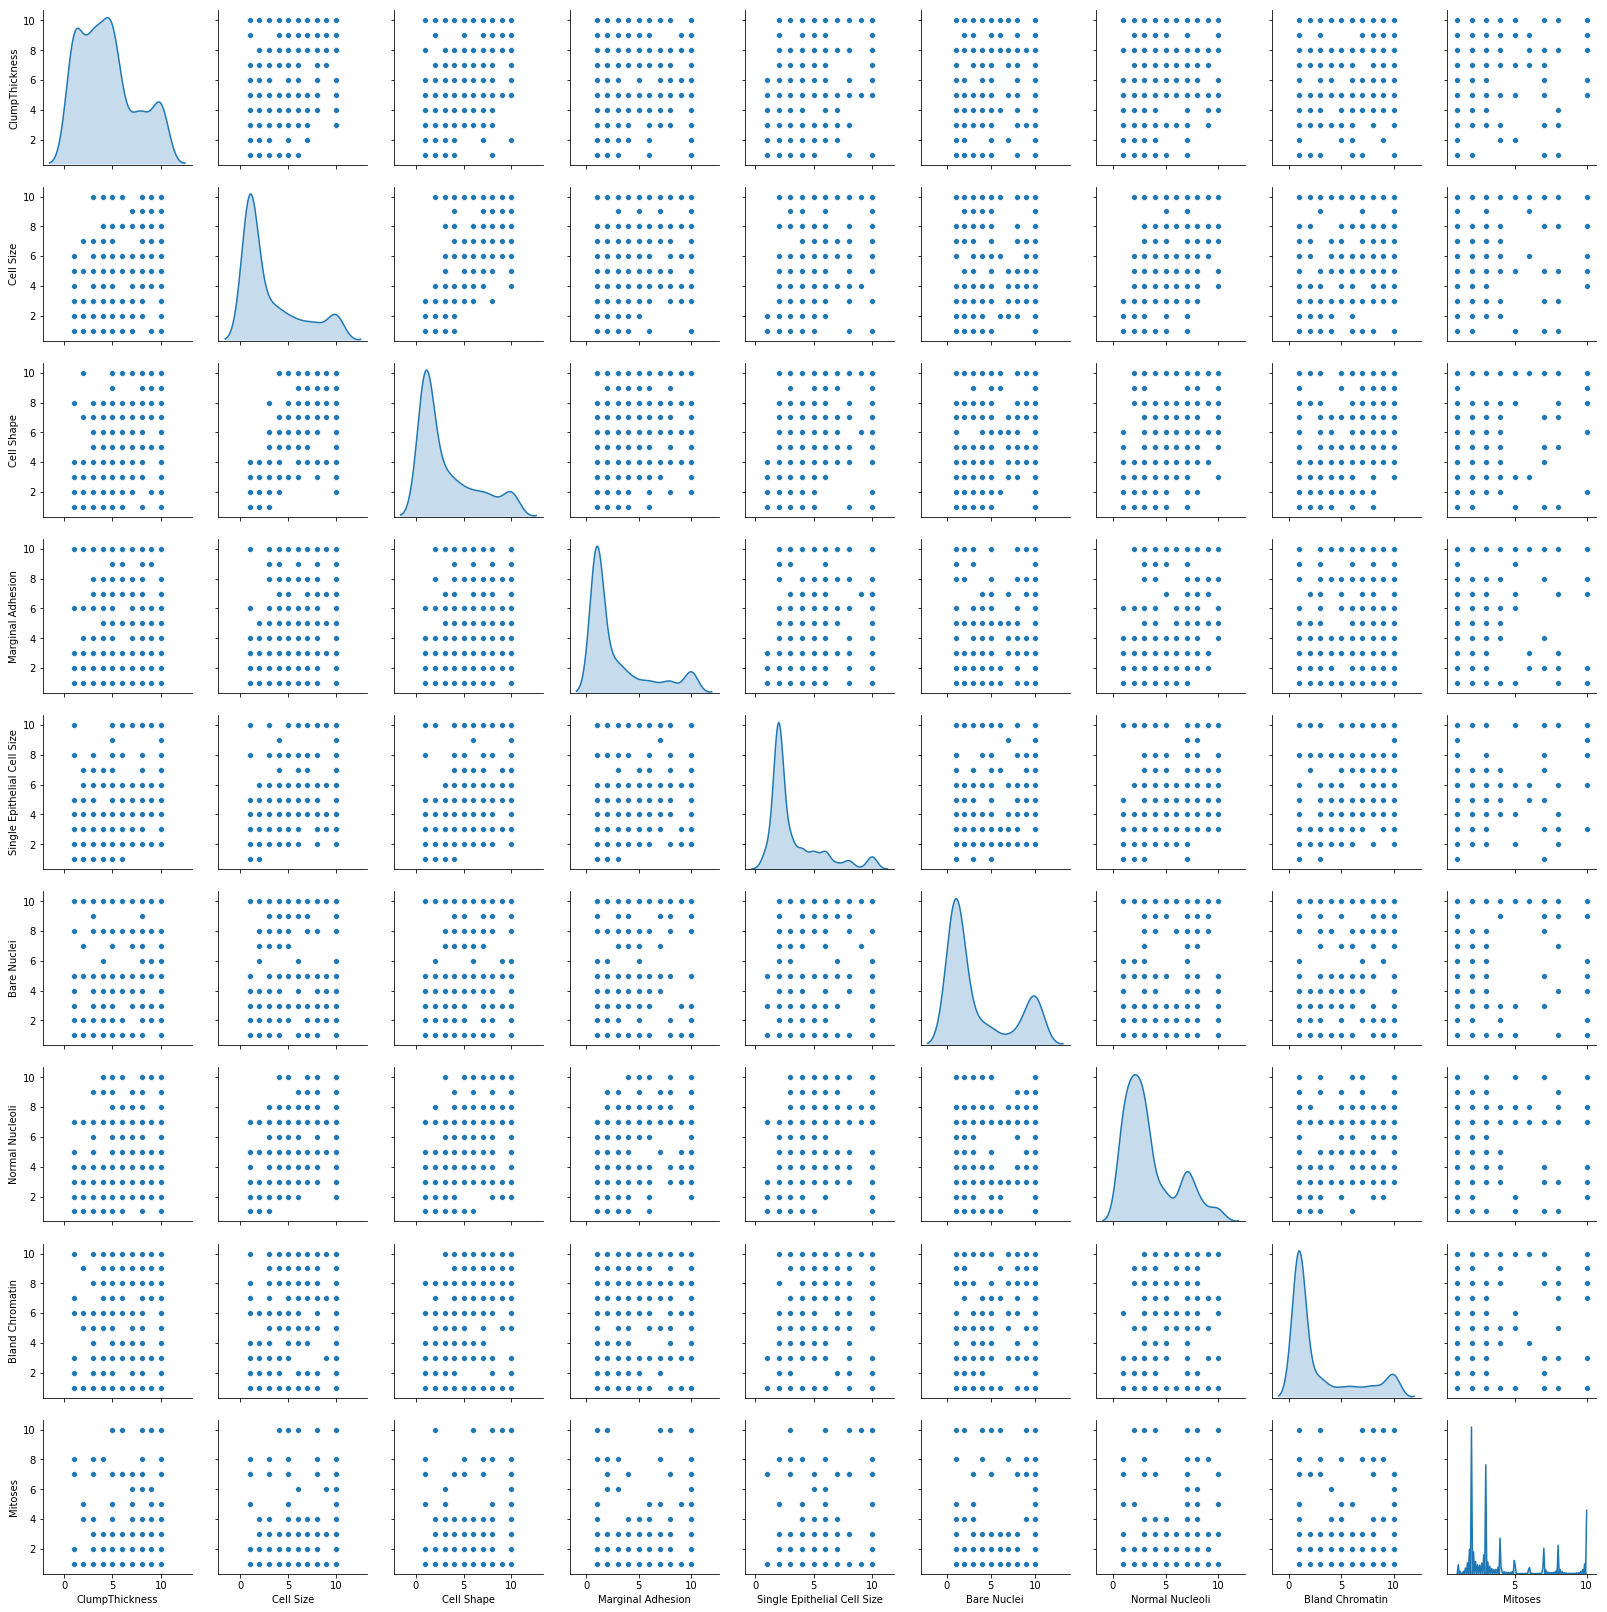

In [70]:
# Check for correlation of variable
sns.pairplot(cancer_source,diag_kind='kde')

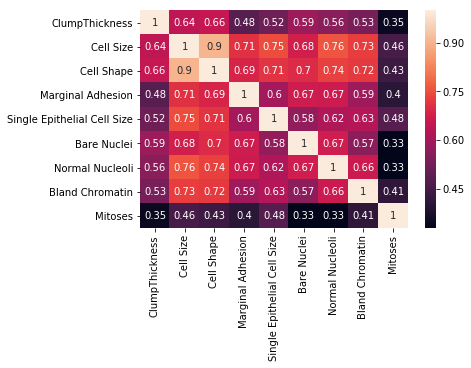

In [71]:
sns.heatmap(cancer_source.corr(),annot=True)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

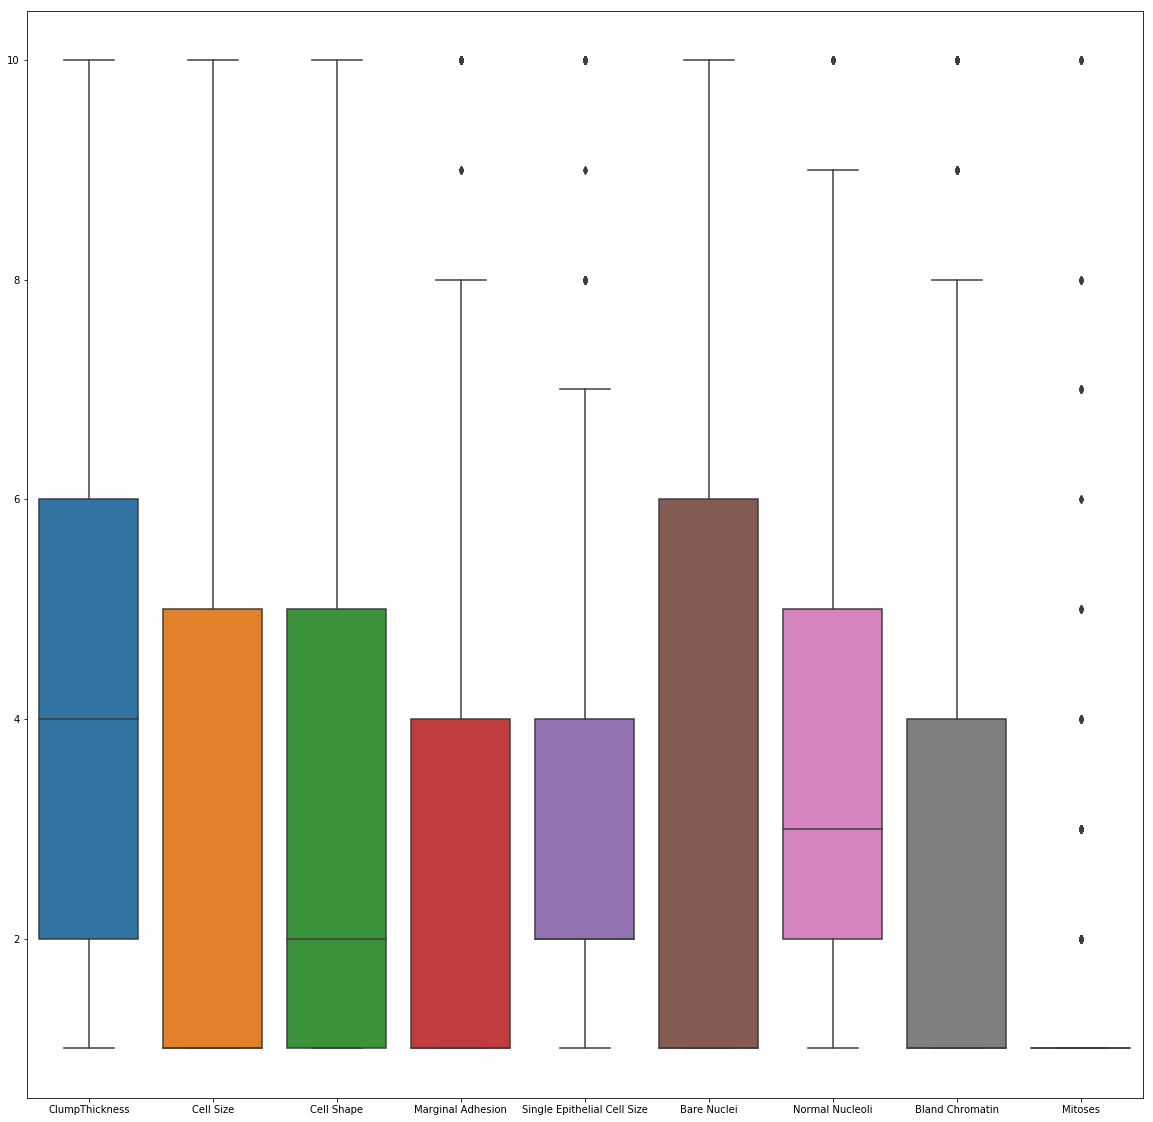

In [81]:
plt.figure(figsize=(20,20))
sns.boxplot(data=cancer_source)

In [83]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
scaler_cancer_source = scaler.fit_transform(cancer_source)
scaler_cancer_source

C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Prakhar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.18511941, -0.71415647, -0.76079064, ..., -0.20251524,
        -0.62696417, -0.3522995 ],
       [ 0.18511941,  0.26730146,  0.24476256, ..., -0.20251524,
        -0.30627275, -0.3522995 ],
       [-0.51518568, -0.71415647, -0.76079064, ..., -0.20251524,
        -0.62696417, -0.3522995 ],
       ...,
       [-0.86533823, -0.71415647, -0.76079064, ..., -1.01636151,
        -0.62696417, -0.3522995 ],
       [ 0.18511941,  2.23021732,  2.25586896, ...,  1.83210045,
         2.25925869,  0.22152166],
       [-0.16503314,  1.57591203,  0.91513136, ...,  2.64594672,
         0.97649297, -0.3522995 ]])

In [88]:
scaler_cancer_source_df = pd.DataFrame(data=scaler_cancer_source,columns = ['ClumpThickness',
'Cell Size',
'Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Normal Nucleoli',
'Bland Chromatin',
'Mitoses'])
scaler_cancer_source_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.185119,-0.714156,-0.760791,-0.649235,-0.568180,-0.702269,-0.202515,-0.626964,-0.3523
1,0.185119,0.267301,0.244763,0.722613,1.658285,1.766944,-0.202515,-0.306273,-0.3523
2,-0.515186,-0.714156,-0.760791,-0.649235,-0.568180,-0.427912,-0.202515,-0.626964,-0.3523
3,0.535272,1.575912,1.585500,-0.649235,-0.122887,0.120802,-0.202515,1.297184,-0.3523
4,-0.165033,-0.714156,-0.760791,0.036689,-0.568180,-0.702269,-0.202515,-0.626964,-0.3523


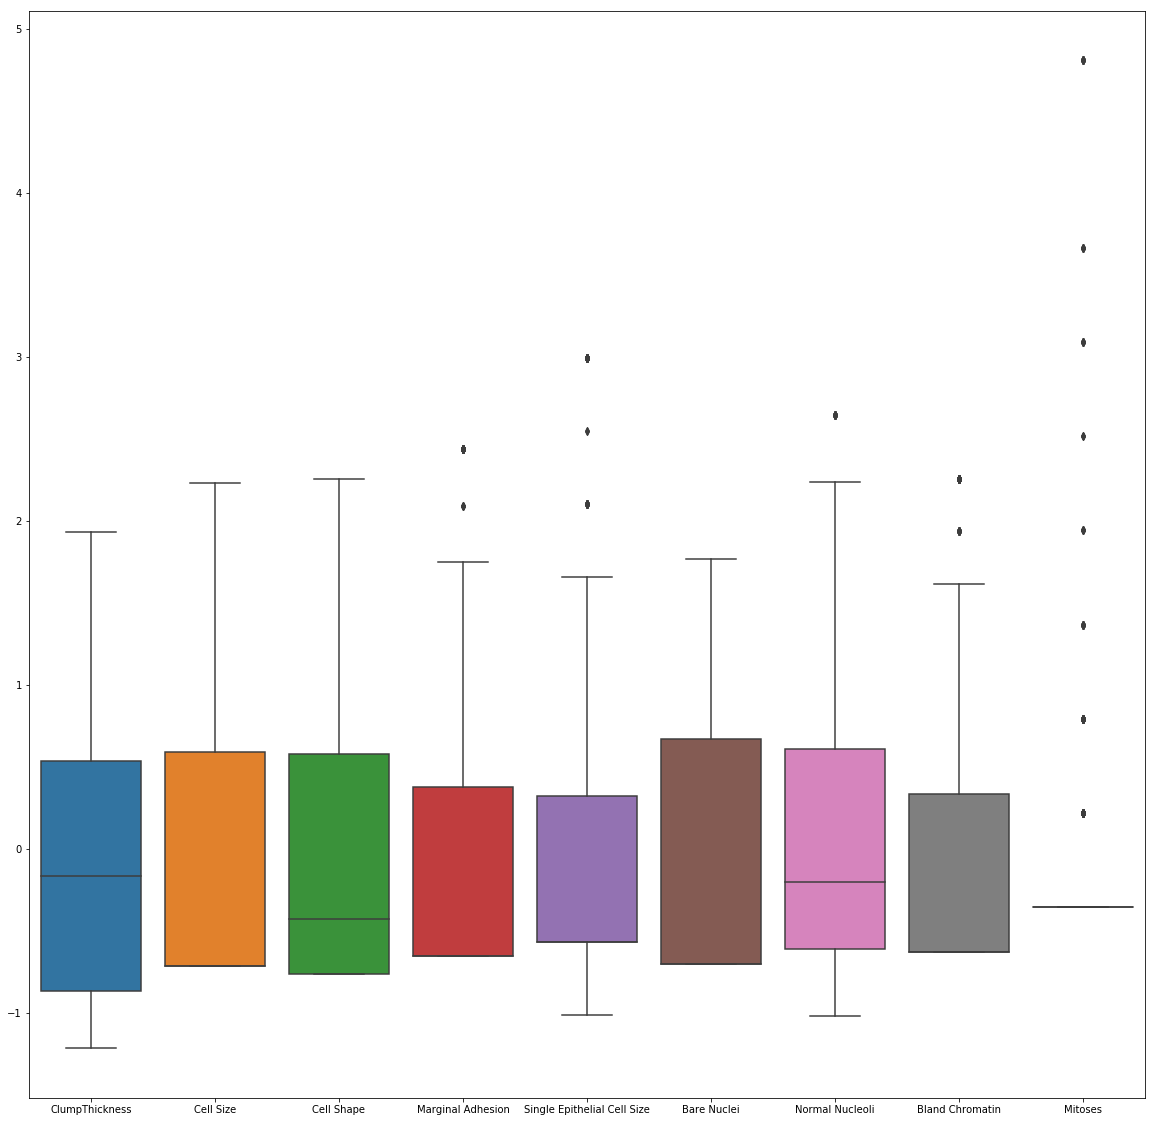

In [91]:
plt.figure(figsize=(20,20))
sns.boxplot(data=scaler_cancer_source_df )

In [101]:
from scipy import stats
scaler_cancer_source_df_z = scaler_cancer_source_df[(np.abs(stats.zscore(scaler_cancer_source_df.drop('Mitoses', axis=1))) <3).all(axis=1)]
scaler_cancer_source_df_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.185119,-0.714156,-0.760791,-0.649235,-0.568180,-0.702269,-0.202515,-0.626964,-0.3523
1,0.185119,0.267301,0.244763,0.722613,1.658285,1.766944,-0.202515,-0.306273,-0.3523
2,-0.515186,-0.714156,-0.760791,-0.649235,-0.568180,-0.427912,-0.202515,-0.626964,-0.3523
3,0.535272,1.575912,1.585500,-0.649235,-0.122887,0.120802,-0.202515,1.297184,-0.3523
4,-0.165033,-0.714156,-0.760791,0.036689,-0.568180,-0.702269,-0.202515,-0.626964,-0.3523


In [104]:
scaler_cancer_source_df_z.shape

(645, 9)

# Q6 Create a covariance matrix for identifying Principal components

In [102]:
from sklearn.decomposition import PCA

In [103]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(scaler_cancer_source_df_z.T)
cov_matrix

array([[1.0015528 , 0.64576496, 0.65699092, 0.48567473, 0.51596751,
        0.58950616, 0.5621321 , 0.53576513, 0.34673846],
       [0.64576496, 1.0015528 , 0.90520515, 0.71251515, 0.75020878,
        0.6774891 , 0.76222363, 0.72940484, 0.45781905],
       [0.65699092, 0.90520515, 1.0015528 , 0.68680849, 0.71313016,
        0.70021306, 0.73627599, 0.72353022, 0.4354951 ],
       [0.48567473, 0.71251515, 0.68680849, 1.0015528 , 0.6018734 ,
        0.66970701, 0.66644732, 0.59482394, 0.40440438],
       [0.51596751, 0.75020878, 0.71313016, 0.6018734 , 1.0015528 ,
        0.57639146, 0.61827886, 0.63019077, 0.48116707],
       [0.58950616, 0.6774891 , 0.70021306, 0.66970701, 0.57639146,
        1.0015528 , 0.6730325 , 0.56755523, 0.33084222],
       [0.5621321 , 0.76222363, 0.73627599, 0.66644732, 0.61827886,
        0.6730325 , 1.0015528 , 0.66452691, 0.32919339],
       [0.53576513, 0.72940484, 0.72353022, 0.59482394, 0.63019077,
        0.56755523, 0.66452691, 1.0015528 , 0.41484535],


In [106]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)


[(5.879288649442196, array([-0.30338937, -0.38250827, -0.37799134, -0.33347794, -0.33624257,
       -0.33186745, -0.34680731, -0.33582738, -0.22651029])), (0.7917492644427798, array([ 0.13321926,  0.03538499,  0.07332816,  0.06549842, -0.18403086,
        0.25393256,  0.24116824, -0.0152094 , -0.90254691])), (0.5420275342888917, array([-0.86681361,  0.03598987, -0.03116285,  0.404477  ,  0.16248484,
       -0.0285072 ,  0.17496644,  0.12522088, -0.0962217 ])), (0.47828796661052153, array([-0.04162001,  0.18973827,  0.16337651, -0.47372031,  0.29749756,
       -0.5574376 ,  0.0191042 ,  0.50361468, -0.24068685])), (0.37166179243386593, array([-0.00610944,  0.11855613,  0.07922979, -0.07205536,  0.73688902,
        0.05877394, -0.22808553, -0.58618758, -0.17983071])), (0.3052218665966315, array([ 0.2280751 ,  0.2159445 ,  0.13911788,  0.59154997, -0.16370813,
       -0.66325387, -0.09735131, -0.22275717, -0.07912321])), (0.2955535739483071, array([ 0.08739534, -0.14460758, -0.07775899,  

In [107]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9th entry 
# cumulative reaching almost 100%

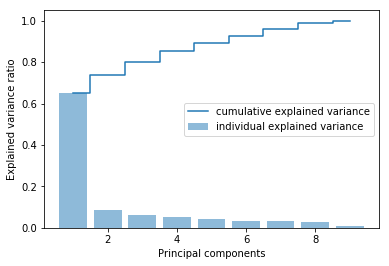

In [109]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q7 Identify eigen values and eigen vector

In [110]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-3.03389374e-01  1.33219262e-01 -8.66813611e-01 -5.26246887e-04
  -4.16200122e-02  2.78236695e-01  2.28075095e-01  8.73953372e-02
  -6.10944429e-03]
 [-3.82508269e-01  3.53849910e-02  3.59898747e-02 -7.44198637e-01
   1.89738270e-01 -4.23920861e-01  2.15944503e-01 -1.44607582e-01
   1.18556130e-01]
 [-3.77991340e-01  7.33281646e-02 -3.11628487e-02  6.51531173e-01
   1.63376510e-01 -6.06557536e-01  1.39117882e-01 -7.77589865e-02
   7.92297943e-02]
 [-3.33477938e-01  6.54984166e-02  4.04477001e-01  5.33883268e-02
  -4.73720308e-01  2.11727335e-01  5.91549973e-01  3.06084506e-01
  -7.20553643e-02]
 [-3.36242572e-01 -1.84030861e-01  1.62484843e-01  7.48596788e-02
   2.97497565e-01  3.81291984e-01 -1.63708127e-01  1.31810927e-01
   7.36889021e-01]
 [-3.31867451e-01  2.53932559e-01 -2.85072021e-02 -8.36800291e-02
  -5.57437599e-01 -1.69405757e-01 -6.63253872e-01  1.86473001e-01
   5.87739356e-02]
 [-3.46807309e-01  2.41168238e-01  1.74966442e-01  7.66276940e-02
   1.91042

In [ ]:
# Step 2- Get eigen values and eigen vector

# Q8 Find variance and cumulative variance by each eigen vector

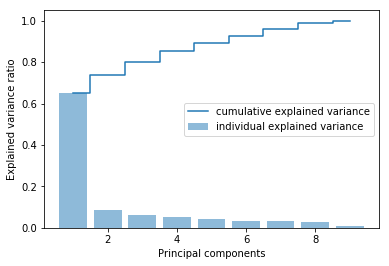

In [111]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [113]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%
print(var_explained)

[0.6522414970268344, 0.08783574957814819, 0.06013190905806137, 0.0530607149865936, 0.04123173028895946, 0.033860961600039735, 0.032788372372559826, 0.028809093841440966, 0.010039971247362363]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [114]:
from mpl_toolkits.mplot3d import Axes3D

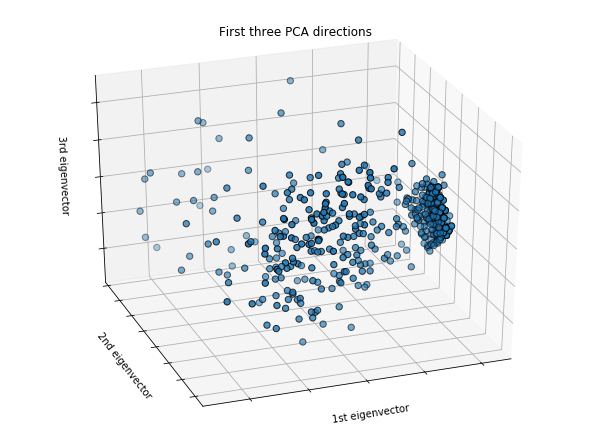

In [115]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA().fit_transform(scaler_cancer_source_df_z)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [116]:
X_reduced

array([[-1.50577694, -0.1059759 , -0.57740328, ...,  0.29804797,
        -0.43545744, -0.00845139],
       [ 1.38299138, -0.51669167,  0.31299847, ..., -0.80132764,
        -0.17339236,  0.03864771],
       [-1.62719192, -0.08234995,  0.02180955, ...,  0.30809121,
        -0.19412921,  0.01413827],
       ...,
       [-2.10672246,  0.23023916,  0.19075191, ..., -0.23339751,
         0.15777569,  0.05335897],
       [ 3.72508373, -0.13477999,  0.7203127 , ...,  0.69355004,
         0.62542735, -0.05518824],
       [ 2.1897848 , -1.12027337,  0.92052894, ...,  1.71601972,
         0.13362747,  0.3917439 ]])

In [117]:
pca= PCA(n_components=9)
pca.fit(scaler_cancer_source_df_z)
X_pca= pca.transform(scaler_cancer_source_df_z)

In [118]:
pca.explained_variance_ratio_

array([0.6522415 , 0.08783575, 0.06013191, 0.05306071, 0.04123173,
       0.03386096, 0.03278837, 0.02880909, 0.01003997])

# Q10 Find correlation between components and features

C:\Users\Prakhar\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


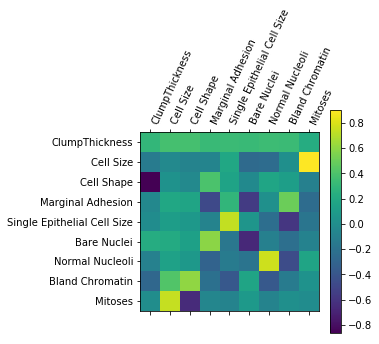

In [123]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8],['ClumpThickness',
'Cell Size',
'Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Normal Nucleoli',
'Bland Chromatin',
'Mitoses'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(scaler_cancer_source_df_z.columns)),scaler_cancer_source_df_z.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [167]:
movies_df = pd.read_csv('movies_metadata.csv')
movies_df.head()

C:\Users\Prakhar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [155]:
jokes_df = pd.read_csv('jokes.csv')

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [156]:
ratings = jokes_df.iloc[0:200,1:len(jokes_df.columns)]

ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [157]:
ratings.columns = range(100)

In [158]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [159]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 100 columns):
0     200 non-null float64
1     200 non-null float64
2     200 non-null float64
3     200 non-null float64
4     200 non-null float64
5     200 non-null float64
6     200 non-null float64
7     200 non-null float64
8     200 non-null float64
9     200 non-null float64
10    200 non-null float64
11    200 non-null float64
12    200 non-null float64
13    200 non-null float64
14    200 non-null float64
15    200 non-null float64
16    200 non-null float64
17    200 non-null float64
18    200 non-null float64
19    200 non-null float64
20    200 non-null float64
21    200 non-null float64
22    200 non-null float64
23    200 non-null float64
24    200 non-null float64
25    200 non-null float64
26    200 non-null float64
27    200 non-null float64
28    200 non-null float64
29    200 non-null float64
30    200 non-null float64
31    200 non-null float64
32    200 non-null float64
33 

In [160]:
ratings.replace(99, 0,inplace = True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [161]:
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [162]:
ratings_diff_df = pd.DataFrame(data = ratings_diff)

In [163]:
ratings_diff_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [166]:
ratings_diff_df.mean().sort_values(ascending = False).head(10).index

Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99, 49], dtype='int64')